In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings(action="ignore")

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import BernoulliRBM
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedKFold
from imblearn.over_sampling import SMOTE
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.datasets import make_classification
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

C:\Users\agarw\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#importing data from the dataset
df = pd.read_csv(r"C:\Users\agarw\OneDrive\Desktop\Dissertation\data.csv")

In [3]:
#checking for bankrupt companies 0 is non-bankrupt and 1 is bankrupt
bankrupt_data = df['Bankrupt?'].value_counts()
bankrupt_data

0    6599
1     220
Name: Bankrupt?, dtype: int64

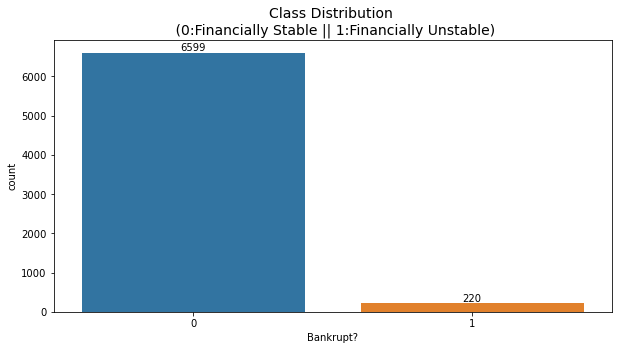

In [4]:
#Distribution representation
plt.figure(figsize = (10,5))
ax = sns.countplot(df['Bankrupt?'])
ax.bar_label(ax.containers[0])
plt.title('Class Distribution \n (0:Financially Stable || 1:Financially Unstable)', fontsize = 14)
plt.show()

In [5]:
# seperate the Bankrupt label from the dataset 
y = df['Bankrupt?']
X = df.drop(['Bankrupt?'], axis = 1)

In [9]:
k_fold = StratifiedKFold(n_splits=10, shuffle=True, random_state=42)

In [13]:
accuracy_scores = []
precision_scores= []
recall_scores = []
f1_scores = []
confusion_matrices = []

In [14]:
for train_index, test_index in k_fold.split(X, y):  # X is the feature data, y is the class labels
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    smote = SMOTE(sampling_strategy = 0.5, random_state=42)
    X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)
    
    scaler = StandardScaler()
    
    X_train_resampled = scaler.fit_transform(X_train_resampled)
    X_test = scaler.transform(X_test)
    
    
    model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(X_train_resampled.shape[1],)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),  
    tf.keras.layers.Dense(1, activation='sigmoid')
    ])

    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    model.fit(X_train_resampled, y_train_resampled, epochs=20, batch_size=32, verbose=2)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    #Evaluation metrics
    val_accuracy = accuracy_score(y_test, y_pred.round())
    accuracy_scores.append(val_accuracy)
    
    precision = precision_score(y_test, y_pred.round())
    precision_scores.append(precision)
    
    recall = recall_score(y_test, y_pred.round())
    recall_scores.append(recall)
    
    f1_value = f1_score(y_test, y_pred.round())
    f1_scores.append(f1_value)
    
    cm = confusion_matrix(y_test, y_pred.round())
    confusion_matrices.append(cm)


Epoch 1/20
279/279 - 1s - loss: 0.2796 - accuracy: 0.8874 - 714ms/epoch - 3ms/step
Epoch 2/20
279/279 - 0s - loss: 0.1726 - accuracy: 0.9343 - 244ms/epoch - 875us/step
Epoch 3/20
279/279 - 0s - loss: 0.1336 - accuracy: 0.9502 - 244ms/epoch - 874us/step
Epoch 4/20
279/279 - 0s - loss: 0.1059 - accuracy: 0.9648 - 242ms/epoch - 867us/step
Epoch 5/20
279/279 - 0s - loss: 0.0866 - accuracy: 0.9717 - 238ms/epoch - 853us/step
Epoch 6/20
279/279 - 0s - loss: 0.0711 - accuracy: 0.9777 - 246ms/epoch - 880us/step
Epoch 7/20
279/279 - 0s - loss: 0.0594 - accuracy: 0.9822 - 245ms/epoch - 877us/step
Epoch 8/20
279/279 - 0s - loss: 0.0491 - accuracy: 0.9855 - 254ms/epoch - 911us/step
Epoch 9/20
279/279 - 0s - loss: 0.0448 - accuracy: 0.9861 - 258ms/epoch - 926us/step
Epoch 10/20
279/279 - 0s - loss: 0.0359 - accuracy: 0.9888 - 243ms/epoch - 872us/step
Epoch 11/20
279/279 - 0s - loss: 0.0310 - accuracy: 0.9912 - 244ms/epoch - 873us/step
Epoch 12/20
279/279 - 0s - loss: 0.0251 - accuracy: 0.9924 - 245m

In [15]:
average_validation_accuracy = np.mean(accuracy_scores)
print("average_validation_accuracy : ",average_validation_accuracy)

average_precision_accuracy = np.mean(precision_scores)
print("average_precision_accuracy : ",average_precision_accuracy)

average_recall_accuracy = np.mean(recall_scores)
print("average_recall_accuracy : ",average_recall_accuracy)

average_f1_value_accuracy = np.mean(f1_scores)
print("average_f1_value_accuracy : ",average_f1_value_accuracy)

average_confusion_matrix = sum(confusion_matrices)
print("average_confusion_matrix : ",average_confusion_matrix)

average_validation_accuracy :  0.9586447823409596
average_precision_accuracy :  0.35949977885891193
average_recall_accuracy :  0.33636363636363636
average_f1_value_accuracy :  0.343921833837132
average_confusion_matrix :  [[6463  136]
 [ 146   74]]
